In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Data.xlsx')

Pages_Per_Sesssion = pd.read_excel(xls, 'Pages per Session')['Pages/Session']
Users = pd.read_excel(xls, 'Users')['Users']
Sessions = pd.read_excel(xls, 'Sessions')['Sessions']
Bounce_Rate = pd.read_excel(xls, 'Bounce Rate')['Bounce Rate']
Sessions_Per_User = pd.read_excel(xls, 'Number of Sessions per User')['Number of Sessions per User']
Page_Views = pd.read_excel(xls, 'Page Views')['Page Views']
New_Users = pd.read_excel(xls, 'New Users')['New Users']
Conversion_Rate = pd.read_excel(xls,'Conversion Rate')['E-commerce Conversion Rate']
Revenue = pd.read_excel(xls,'Revenue')['Revenue']


In [3]:
#convert datasets into arrays
Pages_Per_Sesssion = Pages_Per_Sesssion.values
Users = Users.values
Sessions = Sessions.values
Bounce_Rate = Bounce_Rate.values
Sessions_Per_User = Sessions_Per_User.values
Page_Views = Page_Views.values
New_Users = New_Users.values
Conversion_Rate = Conversion_Rate.values
Revenue = Revenue.values

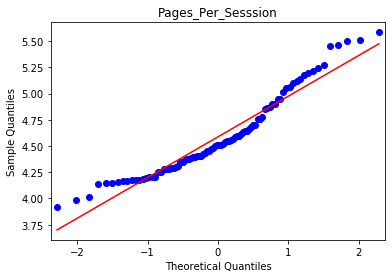

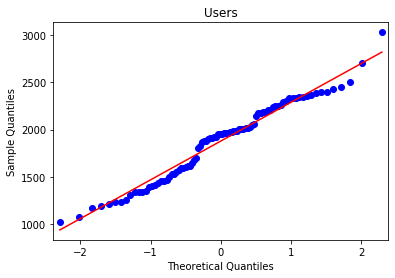

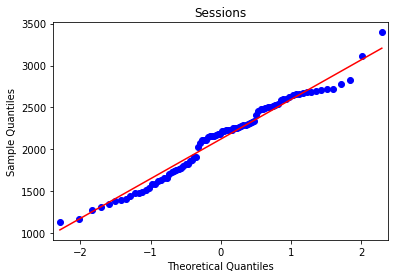

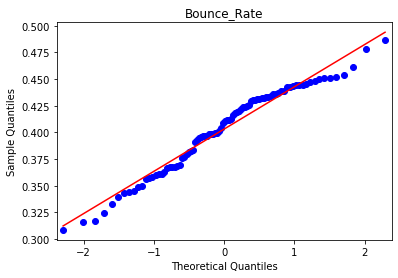

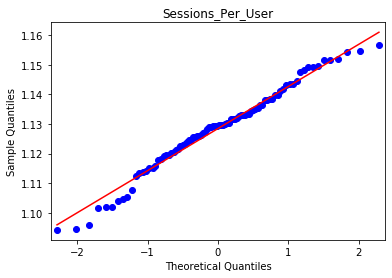

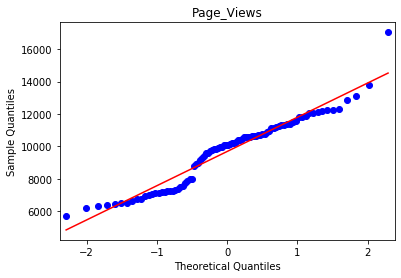

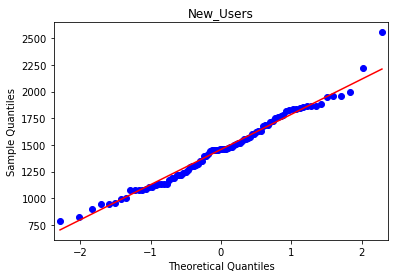

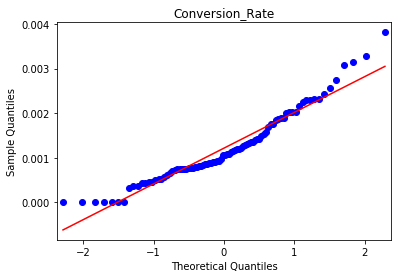

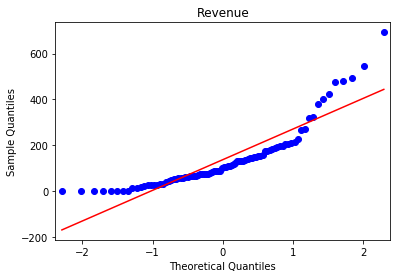

In [4]:
#plot both datasets using qqplot to check for normality
names = ["Pages_Per_Sesssion","Users", "Sessions","Bounce_Rate", "Sessions_Per_User", "Page_Views", "New_Users", "Conversion_Rate","Revenue"]
for index, i in enumerate((Pages_Per_Sesssion, Users, Sessions, Bounce_Rate, Sessions_Per_User, Page_Views, New_Users, Conversion_Rate, Revenue)):
    
    qqplot(i, line='s')
    plt.title(names[index])
    pyplot.show()

### Both datasets look not normal since they fall off the qq plot

In [5]:
# normality test with Shapiro
names = ["Pages_Per_Sesssion","Users", "Sessions","Bounce_Rate", "Sessions_Per_User", "Page_Views", "New_Users", "Conversion_Rate","Revenue"]
for index, i in enumerate((Pages_Per_Sesssion, Users, Sessions, Bounce_Rate, Sessions_Per_User, Page_Views, New_Users, Conversion_Rate, Revenue)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Pages_Per_Sesssion
Statistics=0.936, p=0.000
Sample does not look Gaussian (reject H0)
Users
Statistics=0.972, p=0.049
Sample does not look Gaussian (reject H0)
Sessions
Statistics=0.973, p=0.061
Sample looks Gaussian (fail to reject H0)
Bounce_Rate
Statistics=0.967, p=0.020
Sample does not look Gaussian (reject H0)
Sessions_Per_User
Statistics=0.979, p=0.146
Sample looks Gaussian (fail to reject H0)
Page_Views
Statistics=0.947, p=0.001
Sample does not look Gaussian (reject H0)
New_Users
Statistics=0.981, p=0.210
Sample looks Gaussian (fail to reject H0)
Conversion_Rate
Statistics=0.943, p=0.001
Sample does not look Gaussian (reject H0)
Revenue
Statistics=0.814, p=0.000
Sample does not look Gaussian (reject H0)


### Since all datasets are not normaly distributed non-parametric tests should be used.

In [6]:
### Create a single dataframe
from pandas import DataFrame
data = {"Pages_Per_Sesssion": Pages_Per_Sesssion ,"Users": Users,
         "Sessions": Sessions,"Bounce_Rate": Bounce_Rate, 
         "Sessions_Per_User": Sessions_Per_User, 
         "Page_Views": Page_Views, "New_Users": New_Users, 
         "Conversion_Rate": Conversion_Rate,"Revenue": Revenue}
df = DataFrame(data, columns = names)
df.head()

,Pages_Per_Sesssion,Users,Sessions,Bounce_Rate,Sessions_Per_User,Page_Views,New_Users,Conversion_Rate,Revenue
0,5.050353,1024,1132,0.403710,1.105469,5717,783,0.001767,103.35
1,5.584004,1871,2113,0.324184,1.129343,11799,1291,0.001893,159.87
2,5.514009,1645,1856,0.315733,1.128267,10234,1136,0.001078,23.72
3,5.460812,1604,1799,0.344080,1.121571,9824,1109,0.000556,29.90
4,5.450813,1068,1169,0.381523,1.094569,6372,828,0.002566,184.33


In [7]:
#Visualise basic descriptive statistics about the dataset
import pandas_profiling as pdp

report = pdp.ProfileReport(df, title='Pandas Profiling Report')

report.to_file(output_file="Correlation_report.html")

report

In [8]:
# compute the correlation
df_corr = df.corr(method='spearman')
df_corr

,Pages_Per_Sesssion,Users,Sessions,Bounce_Rate,Sessions_Per_User,Page_Views,New_Users,Conversion_Rate,Revenue
Pages_Per_Sesssion,1.000000,-0.346990,-0.339714,-0.803202,-0.111117,0.037256,-0.437492,0.003598,-0.109611
Users,-0.346990,1.000000,0.997576,0.071426,0.350480,0.890481,0.983067,-0.195943,0.076753
Sessions,-0.339714,0.997576,1.000000,0.070602,0.394840,0.897666,0.981614,-0.181151,0.086393
Bounce_Rate,-0.803202,0.071426,0.070602,1.000000,0.014150,-0.235972,0.169278,0.115473,0.167376
Sessions_Per_User,-0.111117,0.350480,0.394840,0.014150,1.000000,0.410908,0.331961,0.040516,0.111340
Page_Views,0.037256,0.890481,0.897666,-0.235972,0.410908,1.000000,0.841682,-0.134657,0.078678
New_Users,-0.437492,0.983067,0.981614,0.169278,0.331961,0.841682,1.000000,-0.172857,0.094761
Conversion_Rate,0.003598,-0.195943,-0.181151,0.115473,0.040516,-0.134657,-0.172857,1.000000,0.711650
Revenue,-0.109611,0.076753,0.086393,0.167376,0.111340,0.078678,0.094761,0.711650,1.000000


In [9]:
from scipy import stats
# Matrix of correlation p-values
df_p = pd.DataFrame()  
for x in df.columns:
    for y in df.columns:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]
df_p

,Pages_Per_Sesssion,Users,Sessions,Bounce_Rate,Sessions_Per_User,Page_Views,New_Users,Conversion_Rate,Revenue
Pages_Per_Sesssion,0.000000e+00,5.918755e-03,6.010701e-03,1.827236e-22,0.195920,4.146060e-01,1.539435e-04,4.071506e-01,6.061057e-01
Users,5.918755e-03,0.000000e+00,1.654701e-116,8.263892e-01,0.000159,2.034491e-38,8.707113e-66,1.132998e-02,7.023897e-01
Sessions,6.010701e-03,1.654701e-116,0.000000e+00,8.326522e-01,0.000022,6.866677e-39,2.171257e-63,1.236486e-02,7.132797e-01
Bounce_Rate,1.827236e-22,8.263892e-01,8.326522e-01,0.000000e+00,0.987907,7.998988e-04,3.452937e-01,3.029895e-01,2.006605e-01
Sessions_Per_User,1.959201e-01,1.585030e-04,2.153865e-05,9.879072e-01,0.000000,5.715305e-05,5.445043e-04,5.597084e-01,9.956883e-01
Page_Views,4.146060e-01,2.034491e-38,6.866677e-39,7.998988e-04,0.000057,0.000000e+00,3.631210e-28,2.471122e-02,5.844334e-01
New_Users,1.539435e-04,8.707113e-66,2.171257e-63,3.452937e-01,0.000545,3.631210e-28,0.000000e+00,1.812495e-02,9.085167e-01
Conversion_Rate,4.071506e-01,1.132998e-02,1.236486e-02,3.029895e-01,0.559708,2.471122e-02,1.812495e-02,0.000000e+00,1.702841e-12
Revenue,6.061057e-01,7.023897e-01,7.132797e-01,2.006605e-01,0.995688,5.844334e-01,9.085167e-01,1.702841e-12,0.000000e+00


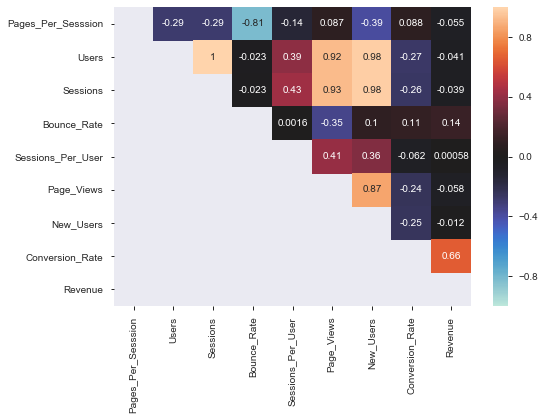

In [10]:
#Visualise the correlation
import seaborn as sn
mask = np.tril(df.corr())
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, center= 0, mask = mask)